## Neural Networks

These lessons are concerned with one of the most widely-used technology buzzwords of our time: "neural networks." You have likely heard about these mathematical objects many times in the media, often in references to their seemingly miraculous capabilities. Before discussing precisely what neural networks are and how they are constructed, we will begin with the question: what problem are we trying to solve? Simply put, **neural networks allow us to build models of functions so complicated that we do not understand their form.**

You have seen in the previous lessons that in order to use machine learning to build models from data, we had to have some idea of the type of function that maps our input data to our output data. If our data was (roughly) linear, we modeled it using linear regression. If our data was "S-shaped", we modeled it using logistic regression. Unfortunately, the real world is full of examples where the function that maps input to output data cannot be understood or written down using any of our traditional mathematical machinery. For example, what is the mathematical form of the following function?

![bird](img/bird.jpeg)

This function cannot be easily written using simple mathematical notation like $x^2$ or $\sin(x)$, **but it is nonetheless a mathematical function.** Just as we found functions that mapped height to weight or credit card balances to default rates, this function within our minds maps the pixels in an image (their positions and their colors) to the concept of "bird." But without knowing the form of the "bird" function, what method should we use to build a model of it? As we shall see shortly, neural networks are the answer.

### Visualizing a Simple Neural Network

Before working with more complex neural network applications such as the image recognition example described above, we're going to start with an extremely simple problem in order to be very clear about how the basic building blocks of neural networks are defined. Suppose that we are considering the following relationship between advertising spending (our independent *x* variable) and sales (our dependent *y* variable):

In [12]:
!ls

00_neural_networks.ipynb       consistency.py
01_building_neural_nets.ipynb  data
02_training_neural_nets.ipynb  img
03_overfitting.ipynb	       models
04_biz_applications.ipynb      __pycache__
05_transfer_learning.ipynb     training_visualization.py
06_further_reading.ipynb       visualization.py


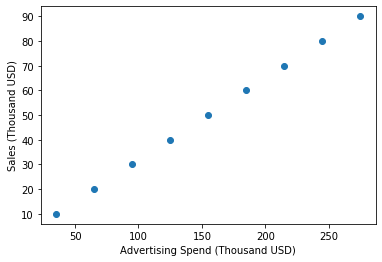

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
ad_spend = np.arange(10,100,10)
sales = 3 * ad_spend + 5
plt.scatter(sales, ad_spend)
plt.xlabel("Advertising Spend (Thousand USD)")
plt.ylabel("Sales (Thousand USD)")
plt.show()

Consider the method of linear regression that we learned about in a previous lesson. This goal of this method is to find a relationship between our dependent variable *y* and an independent variable *x* - specifically, a relationship that has the following mathematical form:

$$ 
y = mx + b
$$ 

where $m$ is the slope and $b$ is the *y*-intercept. We can apply linear regression to our data above and find the values of the slope and *y*-intercept using the following code:

In [14]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(ad_spend.reshape(-1,1), sales)
print("Slope (m):", round(linear_model.coef_[0], 0))
print("Intercept (b):", round(linear_model.intercept_, 0))

Slope (m): 3.0
Intercept (b): 5.0


What would a neural network that represents this simple relationship look like? Let's take a look - first, we'll need to import the `tensorflow` package:

In [15]:
import tensorflow as tf

Tensorflow is a library developed by Google that is widely used for working with neural networks. We'll also need to import the custom function `draw_nn_graph` which is included with this lesson for convenience:

In [16]:
from visualization import draw_nn_graph

Instead of building a neural network to represent the above linear relationship, we're going to load a pre-built network from a file. This will keep the code simple and give you time to master the key concepts before building networks from scratch. We'll load our neural network model using the `load_model` function as shown below - you can ignore the `WARNING` that may appear:

In [17]:
nn_linear_regression = tf.keras.models.load_model('models/linear-regression.h5')

What does this neural network look like? We can take a look using the `draw_nn_graph` function:

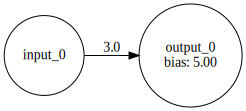

In [18]:
draw_nn_graph(nn_linear_regression)

The network above is the simplest neural network with which you will work. We can understand how it operates by relating it to our linear regression model above. This network operates through the following process:

* We begin with our *input neuron*, labeled as `input_0` in the graph above. This input neuron contains our *x* value - in this example, we'll use an *x* value of `10`.

* We then move along the arrow from left to right. The value of `3.0` that labels this arrow is the *weight* of the edge connecting our input and output neurons. The *x* value from our input neuron is scaled by the value of this weight - resulting in a value of `3.0 *  10 = 30`

* Our *output neuron*, labeled as `output_0`, processes the input value of `30` that it receives from incoming arrow. In this simple example, the only processing it performs is adding a *bias* value of `5.0`. After adding the bias value, it produces the final output result, which in this case is the value `35`. 

Notice that the output value `35` is exactly what is produced by our linear regression model:

In [19]:
input_x_value = np.array([10]).reshape(-1,1)
linear_model.predict(input_x_value)

array([35.])

### A More Complex Example: Multiple Regression

The graphical notation that we used to draw our neural network above may seem overly cumbersome compared to a more compact mathematical notation such as the equation $y = mx + b$. However, we will see that this graphical representation of neural networks becomes more useful as we tackle more advanced applications using more complex neural networks. 

We will take the first step toward performing more complex analyses by considering a *multiple regression* problem in which multiple inputs are required to produce a result. Consider the following hypothetical relationship between the price of a house and its various attributes:

```
[house price] = [intercept] 
                + m1 * [# of bedrooms] 
                + m2 * [size (sq. meters)] 
                + m3 * [school district rating]
```

Let's load a more complex neural network that is capable of representing this type of relationship:

In [20]:
nn_multiple_regression = tf.keras.models.load_model('models/multiple-linear-regression.h5')

We can visualize this network using the `draw_nn_graph` function:

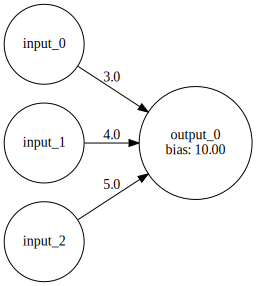

In [21]:
draw_nn_graph(nn_multiple_regression)

Let's walk throught the process of computing an output value for this neural network: 

* We start with a *set* of multiple input values - one per independent variable - each corresponding to one of the three *input neurons*. In this example, we'll start with the input values `6`, `7`, and `8`.

* The values of each of these inputs are scaled by a *different* weight value corresponding to the arrow connecting that input to the single output neuron. This results in the values `3 * 6 = 18`, `4 * 7 = 28`, and `5 * 8 = 40` being sent to the output neuron `output_0`

* The output neuron *sums* all of the inputs that it receives from all of its inbound edges and adds an additional *bias* value on top. It produces a final output value of `18 + 28 + 40 + 10 = 96`

### Modelling Non-Linear Relationships

Recall that we have previously studied examples of non-linear relationships like the common *S*-shaped logistic curve:

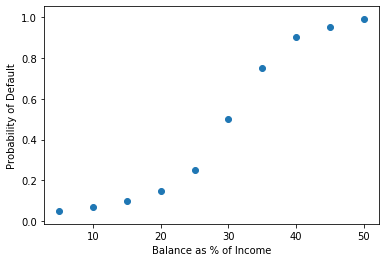

In [22]:
balance_as_pct_of_income = np.arange(5, 55, 5)
probability_of_default = np.array([0.05, 0.07, 0.10, 0.15, 0.25, 0.5, 0.75, 0.90, 0.95,0.99])
plt.scatter(balance_as_pct_of_income, probability_of_default)
plt.xlabel('Balance as % of Income')
plt.ylabel('Probability of Default')
plt.show()

How can we adapt the neural networks that we studied above to represent this type of non-linear relationship? In order to accomplish this objective, we need to add an *activation function* to our output neuron. Recall that the simple output neurons we studied above worked like this:

```
[output_0] = bias + w_0 * [input_0] + w_1 * [input_1] ...
```

Our new output neuron will work almost exactly the same way, but with one additional step added:

```
[subtotal] = bias + w_0 * [input_0] + w_1 * [input_1] ...
[output_0] = activation_function([subtotal])
```

What exactly is the `activation_function` we wrote above? There are several "standard" choices that we can pick from - for modelling an *S*-shaped curve like the one shown above, we'll use the *sigmoid* activation function, which has the following formula:

$$
\mathrm{sigmoid}(x) = \frac{1}{1 + e^{-x}}
$$

We can see that this function has the appropriate *S*-shape:

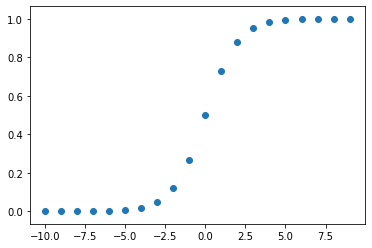

In [23]:
example_x_values = np.arange(-10,10)
sigmoid_output = 1.0/(1.0 + np.exp(-example_x_values))
plt.scatter(example_x_values, sigmoid_output)
plt.show()

In [24]:
sigmoid_output, type(sigmoid_output)

(array([4.53978687e-05, 1.23394576e-04, 3.35350130e-04, 9.11051194e-04,
        2.47262316e-03, 6.69285092e-03, 1.79862100e-02, 4.74258732e-02,
        1.19202922e-01, 2.68941421e-01, 5.00000000e-01, 7.31058579e-01,
        8.80797078e-01, 9.52574127e-01, 9.82013790e-01, 9.93307149e-01,
        9.97527377e-01, 9.99088949e-01, 9.99664650e-01, 9.99876605e-01]),
 numpy.ndarray)

Let's now load a neural network that makes use of this S-shaped sigmoid activation function:

In [25]:
nn_sigmoid = tf.keras.models.load_model('models/sigmoid.h5')

We can see that this network looks much like the simple linear model that we looked at previously, but the sigmoid activation function has been attached to the output neuron: 

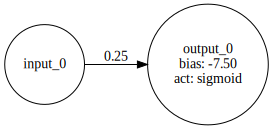

In [26]:
draw_nn_graph(nn_sigmoid)

We can see from the graph above that this model performs the following process:

```
[subtotal] = -7.5 + 0.25 * [input_0]
[output_0] = sigmoid([subtotal])
```

When we evaluate this model by passing it input data, we can see that it produces the appropriate S-shaped curve: 

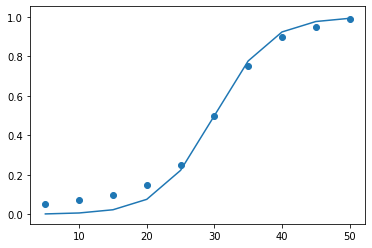

In [27]:
predicted_y = nn_sigmoid.predict(balance_as_pct_of_income)
plt.scatter(balance_as_pct_of_income, probability_of_default)
plt.plot(balance_as_pct_of_income, predicted_y)
plt.show()

### Another Type of Activation Function: ReLU

Recall that we introduced the notion of an activation function on our output neuron, we left open the possibility of using any arbitrary function for our activation function - all that matters is that we evaluate the `[subtotal]` of our inputs in the standard manner before plugging it into the activation function:


```
[subtotal] = bias + w_0 * [input_0] + w_1 * [input_1] ...
[output_0] = activation_function([subtotal])
```

There are many more choices of `activation_function` besides the sigmoid function that we learned previously. One of the most commonly used is the **ReLU** activation function, which stands for "Rectified Linear Unit." This function is defined as follows:

```
ReLU(x) = max(0, x)
```

You can interpret the above definition as meaning that a ReLU neuron "turns on" once its argument exceeds zero.

Let's load a model using this activation function to see how it works:

In [28]:
nn_relu = tf.keras.models.load_model('models/relu.h5')

Let's take a look at this model:

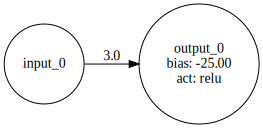

In [29]:
draw_nn_graph(nn_relu)

Using the ReLU activation function gives our output a distinctive shape:

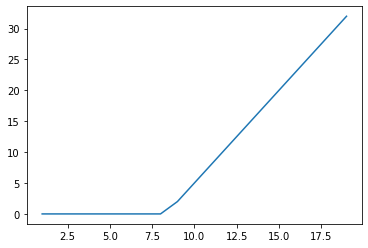

In [30]:
nn_relu_x = np.arange(1,20)
nn_relu_predicted_y = nn_relu.predict(nn_relu_x)
plt.plot(nn_relu_x, nn_relu_predicted_y)
plt.show()

## Deep Learning: Adding More Layers

Serious applications of neural networks are often referred to as part of a field named "deep learning" because they use many, many layers of neurons that are linked together. Let's load a deeper neural network in order to explore this concept:

In [31]:
nn_3_layer = tf.keras.models.load_model('models/3_layer.h5')

When we visualize the new network as shown below, we can see that this network contains a **hidden layer** - a layer in betweeen the input and the output layer:

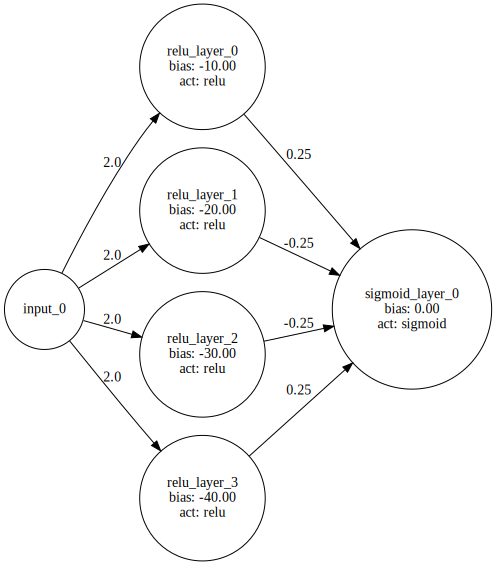

In [32]:
draw_nn_graph(nn_3_layer)

Let's pass some input data through this network to see what sort of output it produces:

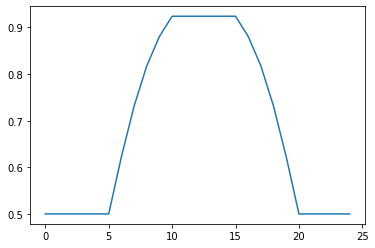

In [33]:
nn_3_layer_x = np.arange(0,25)
nn_3_layer_predicted_y = nn_3_layer.predict(nn_3_layer_x)
plt.plot(nn_3_layer_x, nn_3_layer_predicted_y)
plt.show()

As you can see above, this more complex network is capable of representing a function with an interesting shape that we have not previously seen before.

 This is what makes neural networks so powerful - with the appropriate number of hidden neurons and the appropriate parameter values, neural networks can represent *any function* - the mathematical result behind this statement is known as the [universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem). 

Now that you've learned what neural networks are and the nature of their building blocks, we'll teach you how to build them yourself in the next lesson. We haven't included an exercise in this lesson as its subject matter is mostly graphical and conceptual, but don't worry - you'll get a chance to write your own TensorFlow code soon. 